## Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows',10000)

## Problem Statement

In [2]:
# Your client is a meal delivery company which operates in multiple cities.
# They have various fulfillment centers in these cities for dispatching meal orders to their customers.
# The client wants you to help these centers with demand forecasting for upcoming weeks so that these centers will
# plan the stock of raw materials accordingly.

# The replenishment of majority of raw materials is done on weekly basis and since the raw material is perishable,
# the procurement planning is of utmost importance.
# Secondly, staffing of the centers is also one area wherein accurate demand forecasts are really helpful.
# Given the following information, the task is to predict the
# demand for the next 10 weeks (Weeks: 146-155) for the center-meal combinations in the test set:  

# Historical data of demand for a product-center combination (Weeks: 1 to 145)
# Product(Meal) features such as category, sub-category, current price and discount
# Information for fulfillment center like center area, city information etc.

## Data set 

In [3]:
df = pd.read_csv(r"C:\Users\AMAN SINGH\OneDrive\Desktop\train.csv")
df.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [31]:
df.shape

(456548, 9)

In [4]:
df1 = pd.read_csv(r"C:\Users\AMAN SINGH\OneDrive\Desktop\meal_info.csv")
df1.head()

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [33]:
df1.category.nunique()

14

In [34]:
df1.isnull().sum()

meal_id     0
category    0
cuisine     0
dtype: int64

In [5]:
df2 = pd.read_csv(r"C:\Users\AMAN SINGH\OneDrive\Desktop\fulfilment_center_info.csv")
df2.head()

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


In [6]:
df2.isnull().sum()

center_id      0
city_code      0
region_code    0
center_type    0
op_area        0
dtype: int64

In [7]:
df2.shape

(77, 5)

In [8]:
dfm = pd.merge(df,df1,on='meal_id')

In [9]:
dfm.isnull().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
category                 0
cuisine                  0
dtype: int64

In [10]:
dfm

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai
1,1040403,1,24,1885,136.83,136.83,0,0,1498,Beverages,Thai
2,1103215,1,11,1885,136.83,136.83,0,0,959,Beverages,Thai
3,1034383,1,83,1885,121.31,120.31,0,1,1025,Beverages,Thai
4,1118999,1,32,1885,114.52,113.52,0,1,445,Beverages,Thai
...,...,...,...,...,...,...,...,...,...,...,...
456543,1458599,145,65,2104,582.03,582.03,0,0,134,Fish,Continental
456544,1417199,145,110,2104,582.03,581.03,0,0,28,Fish,Continental
456545,1434028,145,68,2104,582.03,581.03,0,0,40,Fish,Continental
456546,1205895,145,51,2104,641.23,640.23,0,0,69,Fish,Continental


## Merging tables

In [11]:
df_f = pd.merge(dfm,df2,on='center_id')

In [12]:
df_f

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0
1,1018704,2,55,1885,135.83,152.29,0,0,323,Beverages,Thai,647,56,TYPE_C,2.0
2,1196273,3,55,1885,132.92,133.92,0,0,96,Beverages,Thai,647,56,TYPE_C,2.0
3,1116527,4,55,1885,135.86,134.86,0,0,163,Beverages,Thai,647,56,TYPE_C,2.0
4,1343872,5,55,1885,146.50,147.50,0,0,215,Beverages,Thai,647,56,TYPE_C,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,1437396,141,61,2104,583.03,630.53,0,1,13,Fish,Continental,473,77,TYPE_A,4.5
456544,1060716,142,61,2104,581.03,582.03,0,0,42,Fish,Continental,473,77,TYPE_A,4.5
456545,1029231,143,61,2104,583.03,581.03,0,0,40,Fish,Continental,473,77,TYPE_A,4.5
456546,1141147,144,61,2104,582.03,581.03,0,0,53,Fish,Continental,473,77,TYPE_A,4.5


In [13]:
df_f.describe()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,op_area
count,4.565480e+05,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.00000,456548.000000,456548.000000,456548.000000,456548.000000
mean,1.250096e+06,74.768771,82.105796,2024.337458,332.238933,354.156627,0.081152,0.10920,261.872760,601.553399,56.614566,4.083590
std,1.443548e+05,41.524956,45.975046,547.420920,152.939723,160.715914,0.273069,0.31189,395.922798,66.195914,17.641306,1.091686
min,1.000000e+06,1.000000,10.000000,1062.000000,2.970000,55.350000,0.000000,0.00000,13.000000,456.000000,23.000000,0.900000
25%,1.124999e+06,39.000000,43.000000,1558.000000,228.950000,243.500000,0.000000,0.00000,54.000000,553.000000,34.000000,3.600000
50%,1.250184e+06,76.000000,76.000000,1993.000000,296.820000,310.460000,0.000000,0.00000,136.000000,596.000000,56.000000,4.000000
75%,1.375140e+06,111.000000,110.000000,2539.000000,445.230000,458.870000,0.000000,0.00000,324.000000,651.000000,77.000000,4.500000
max,1.499999e+06,145.000000,186.000000,2956.000000,866.270000,866.270000,1.000000,1.00000,24299.000000,713.000000,93.000000,7.000000


In [14]:
df_final = df_f.copy(deep = True)

## changing datatypes

In [15]:
df_f['emailer_for_promotion']=df_f['emailer_for_promotion'].astype('object')
df_f['homepage_featured']=df_f['homepage_featured'].astype('object')
df_f['region_code']=df_f['region_code'].astype('object')
df_f['city_code']=df_f['city_code'].astype('object')
df_f['center_id']=df_f['center_id'].astype('object')

# As they all are having category in them

In [16]:
num_col = df_f.select_dtypes(include = np.number).columns
num_col

Index(['id', 'week', 'meal_id', 'checkout_price', 'base_price', 'num_orders',
       'op_area'],
      dtype='object')

In [17]:
cat_col = df_f.select_dtypes(exclude = np.number).columns
cat_col

Index(['center_id', 'emailer_for_promotion', 'homepage_featured', 'category',
       'cuisine', 'city_code', 'region_code', 'center_type'],
      dtype='object')

In [18]:
df_f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456548 entries, 0 to 456547
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  object 
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  object 
 7   homepage_featured      456548 non-null  object 
 8   num_orders             456548 non-null  int64  
 9   category               456548 non-null  object 
 10  cuisine                456548 non-null  object 
 11  city_code              456548 non-null  object 
 12  region_code            456548 non-null  object 
 13  center_type            456548 non-null  object 
 14  op_area                456548 non-nu

In [19]:
df_f.op_area.value_counts()

4.0    52548
3.9    48533
3.8    40080
4.4    26060
4.5    25688
2.8    25503
4.1    23346
7.0    20686
4.8    18648
3.4    17258
3.6    16821
5.1    13366
4.2    12608
2.7    12430
3.0    11184
2.0     9512
6.7     7046
6.3     7015
5.6     6993
3.7     6801
3.5     6666
3.2     6333
5.0     6164
5.3     6053
4.6     5983
4.7     5975
2.4     5021
2.9     4712
1.9     4083
0.9     3432
Name: op_area, dtype: int64

# Univariate Analysis

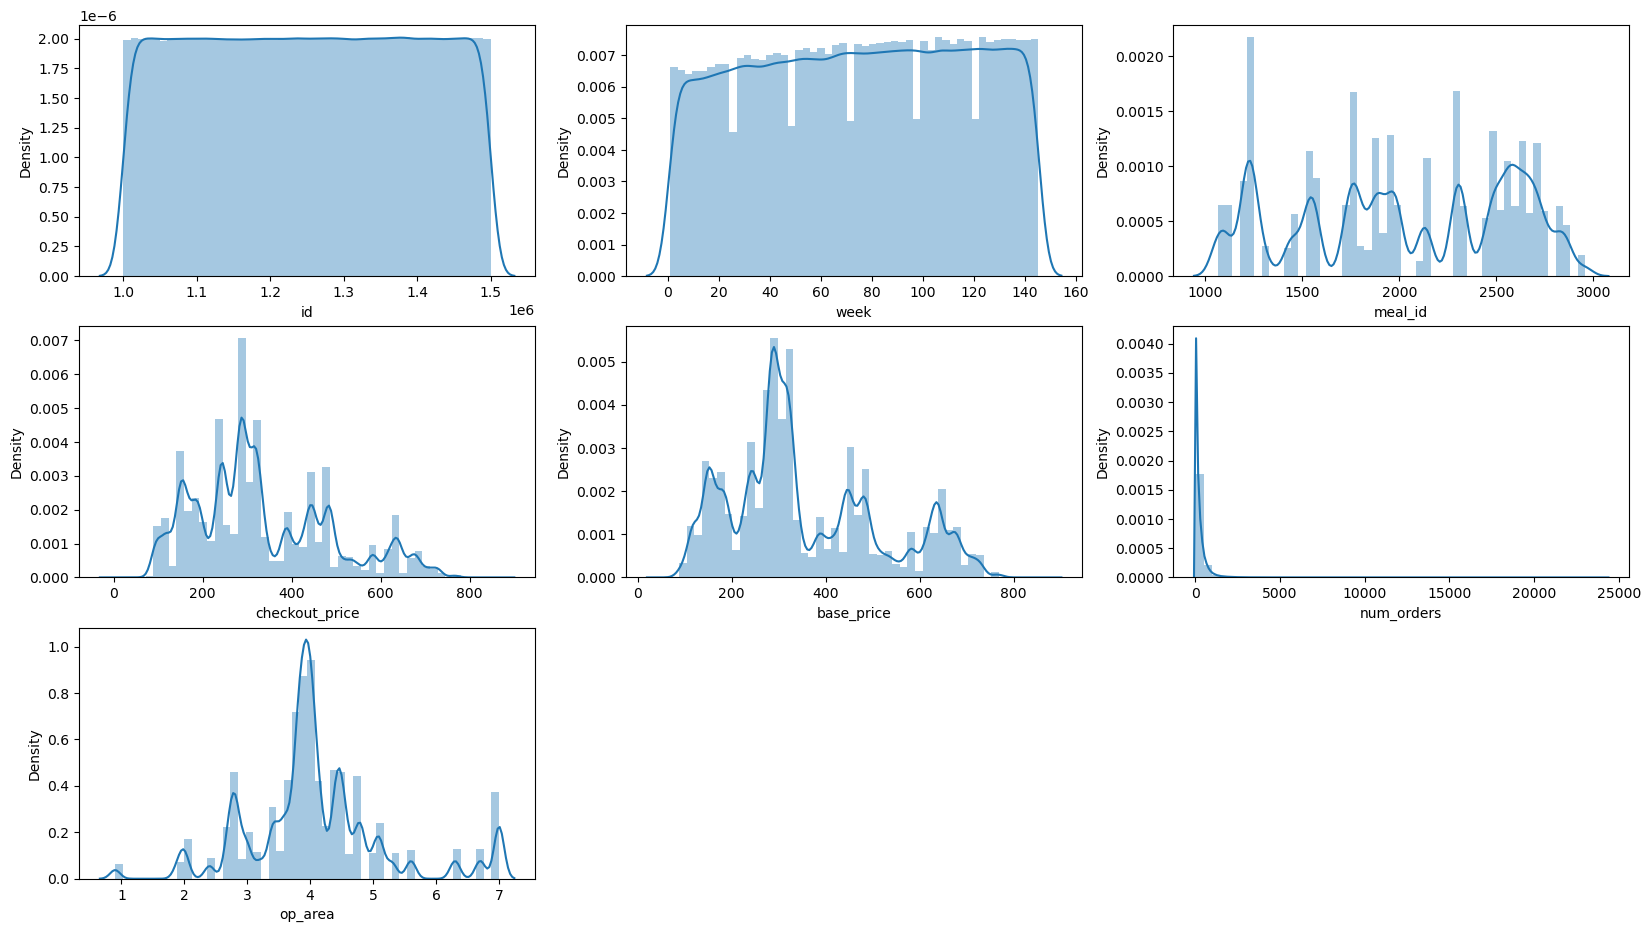

In [20]:
plt.figure(figsize=(20,15))
num_col
t = 1
for i in num_col:
    plt.subplot(4,3,t)
    sns.distplot(df_f[i])
    t+=1
plt.show()


# 1. Most of the orders having base price range in between 200 to 400.
# 1. Checkout price ranges varies similar to base price with a little
# discount.
# 1. Maximum orders placed from restaurant are having operation area
# within 3.5 to 4.5 SqKm.

In [21]:
df_f.skew()

# homepage_featured ,emailer_for_promotion ,checkout_price,base_price having skewness and they all are positively skeweed

id                      -0.001102
week                    -0.049517
center_id                0.345130
meal_id                 -0.172884
checkout_price           0.672330
base_price               0.637661
emailer_for_promotion    3.067713
homepage_featured        2.506022
num_orders               6.929966
city_code               -0.209131
region_code              0.056254
op_area                  0.664414
dtype: float64

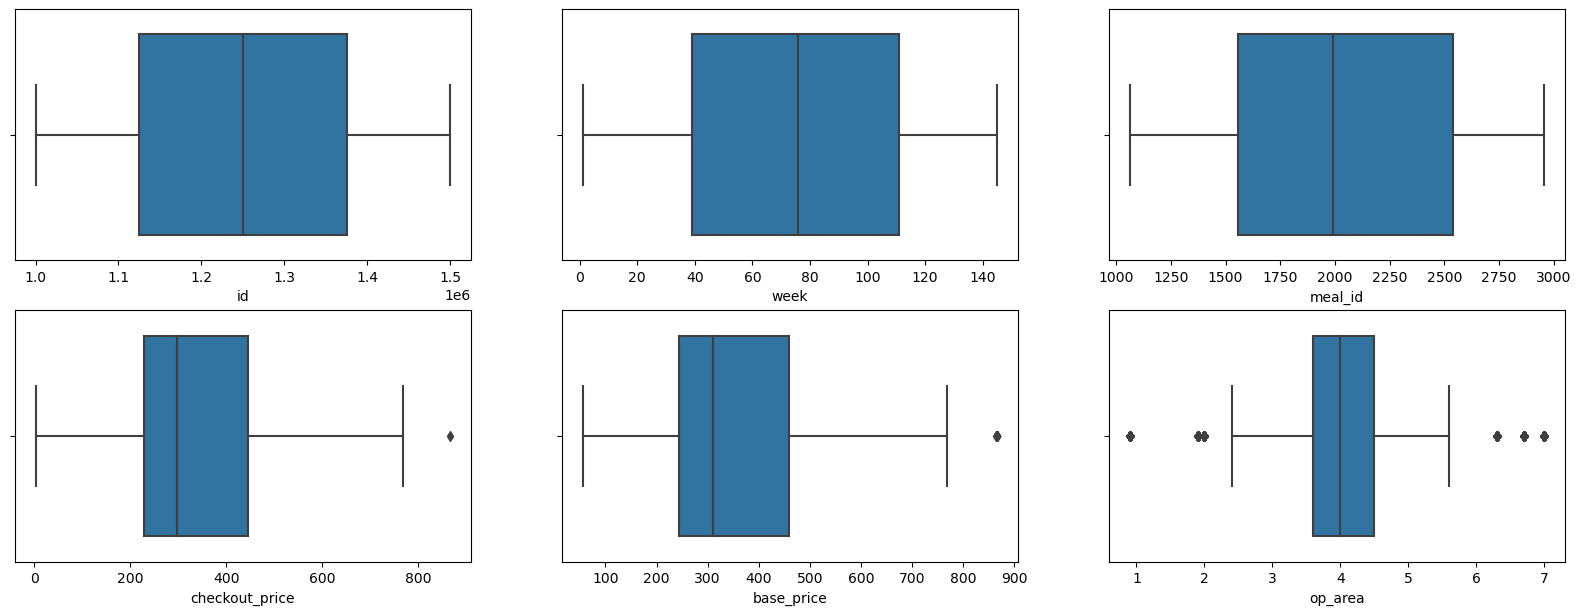

In [22]:
plt.figure(figsize=(20,15))
num_col
t = 1
for i in num_col:
    if i != 'num_orders':
        plt.subplot(4,3,t)
        sns.boxplot(df_f[i])
        t+=1
plt.show()

# base_price , op_area , checkout_price all are having outliers

# ● We have seen few outlier in the checkout_price , op_area & base_price .
# ● Num_orders is the target variable. It has many outlier .

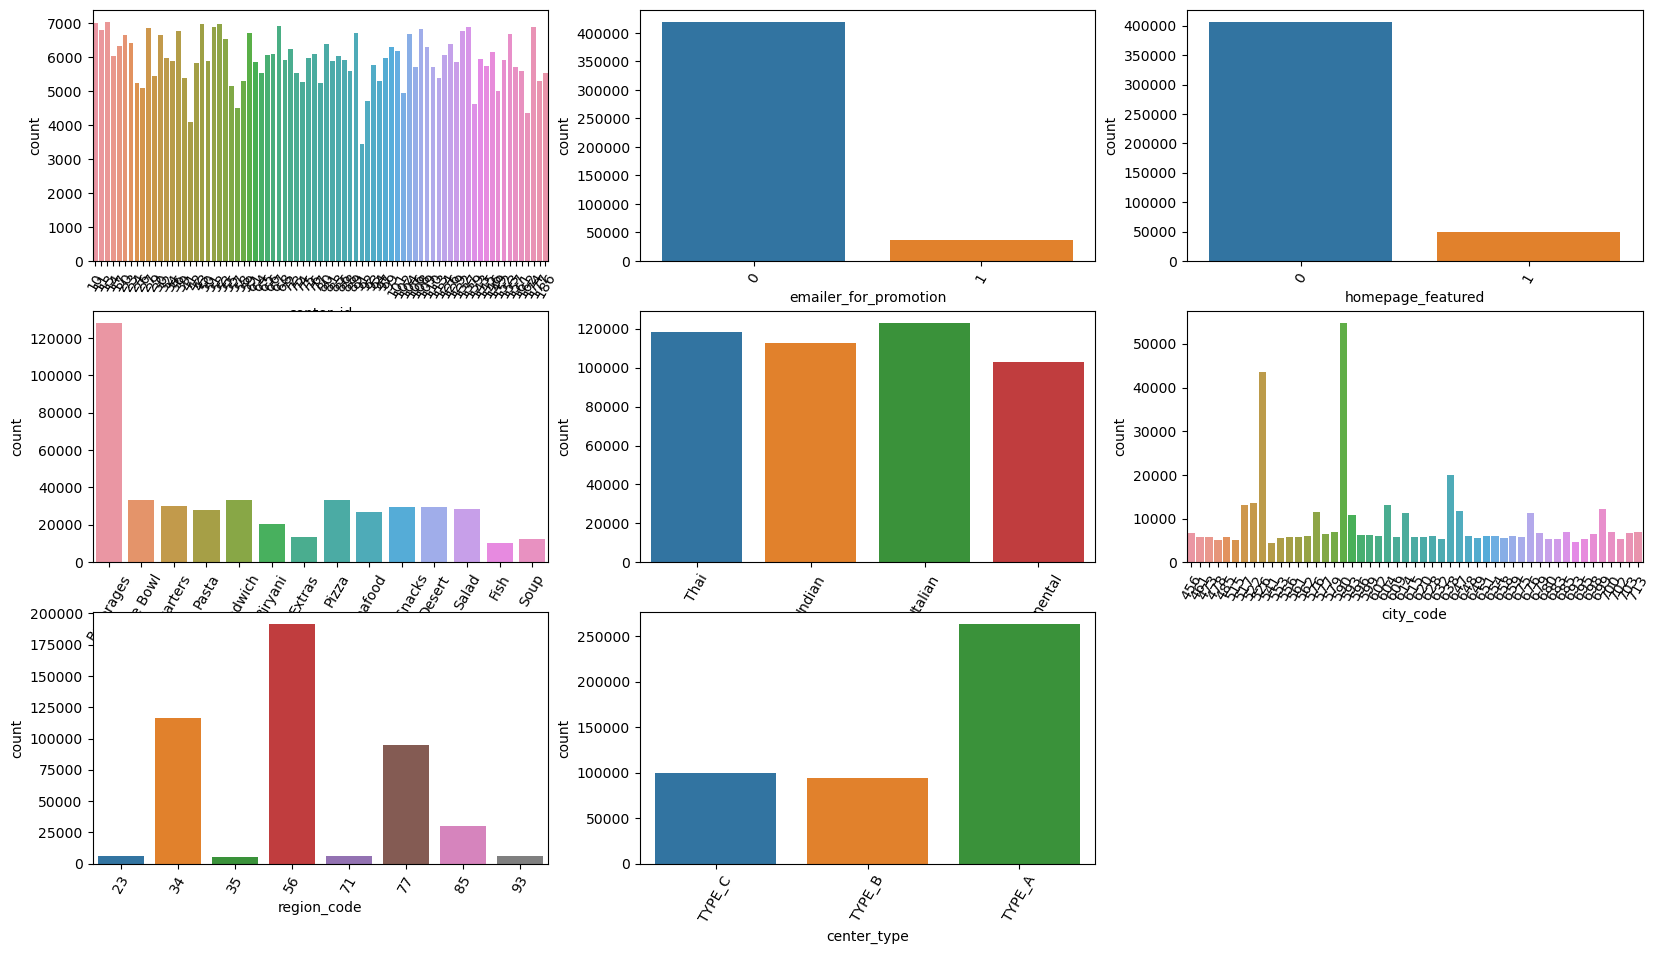

In [23]:
plt.figure(figsize=(20,15))
cat_col
t = 1
for i in cat_col:
    plt.subplot(4,3,t)
    sns.countplot(df_f[i])
    t+=1
    plt.xticks(rotation = 60)
plt.show()

# 1. Beverages and Rice Bowl are the food category which has the
# highest number of orders and Soup and Fish are the food
# category with least number of orders.
# 2. In specific Cuisine-Food Category has the highest number of
# orders.In that Food Category we could see that Indian-Rice Bowl
# has the highest number of orders and Indian-Biriyani has the least
# no of orders.

# 1. Italian is the Most Ordered Cuisine, followed by Thai and Indian.
# 2. Type_A Centers are catering to most of the Orders, while Type_B center deals
# with the Lowest no. of orders.

# Bivariate analysis

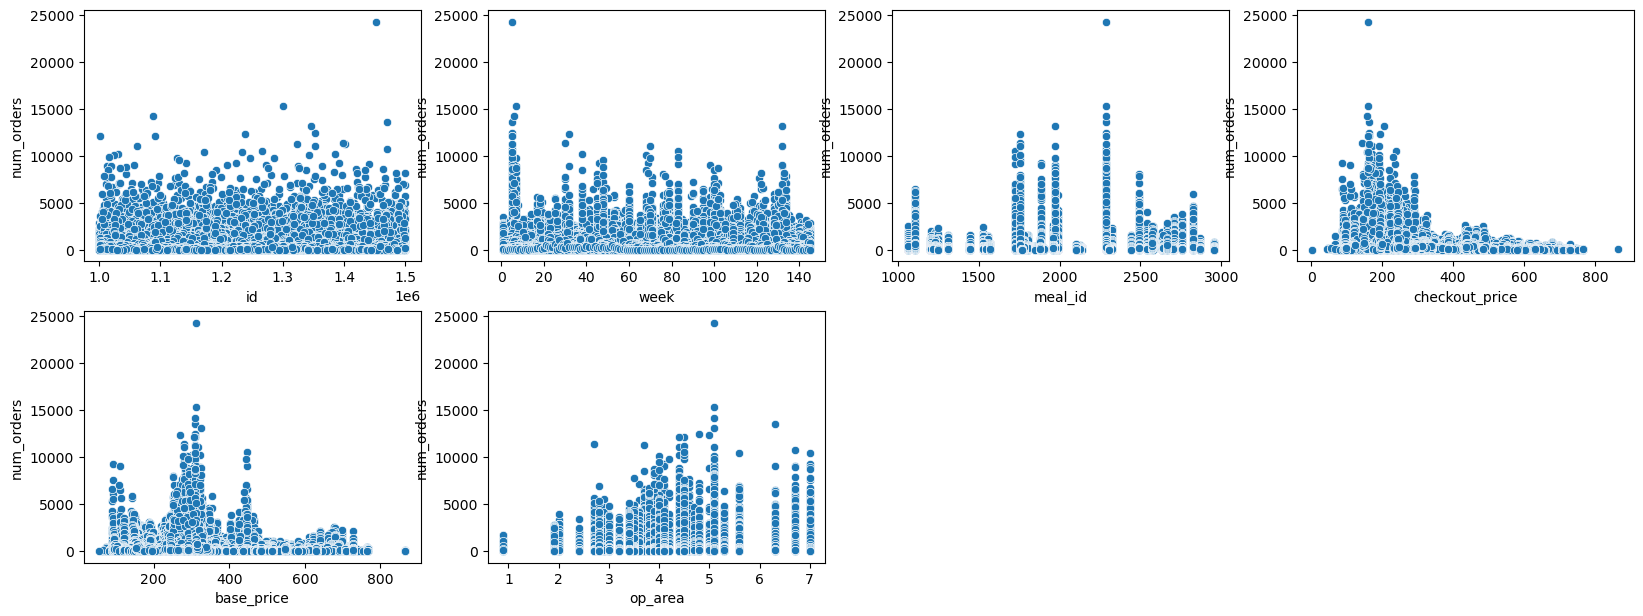

In [24]:
plt.figure(figsize=(20,15))
t = 1
for i in num_col:
    if i!= 'num_orders':
        plt.subplot(4,4,t)
        sns.scatterplot(df_f[i],df_f['num_orders'])
        t+=1
    
plt.show()


# 1. Most of the Orders have Checkout_Price in range from 100 to 300. It shows that
# there are less bulk orders.
# 2. Most of the Orders have Base Price less than 500. It shows customers are ordering
# for 1 or 2 people only at once.

<AxesSubplot:xlabel='base_price', ylabel='num_orders'>

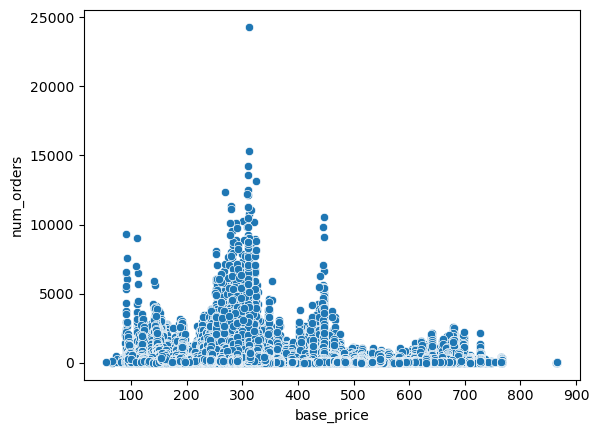

In [25]:
sns.scatterplot(y = df_f['num_orders'],x = df_f['base_price'])

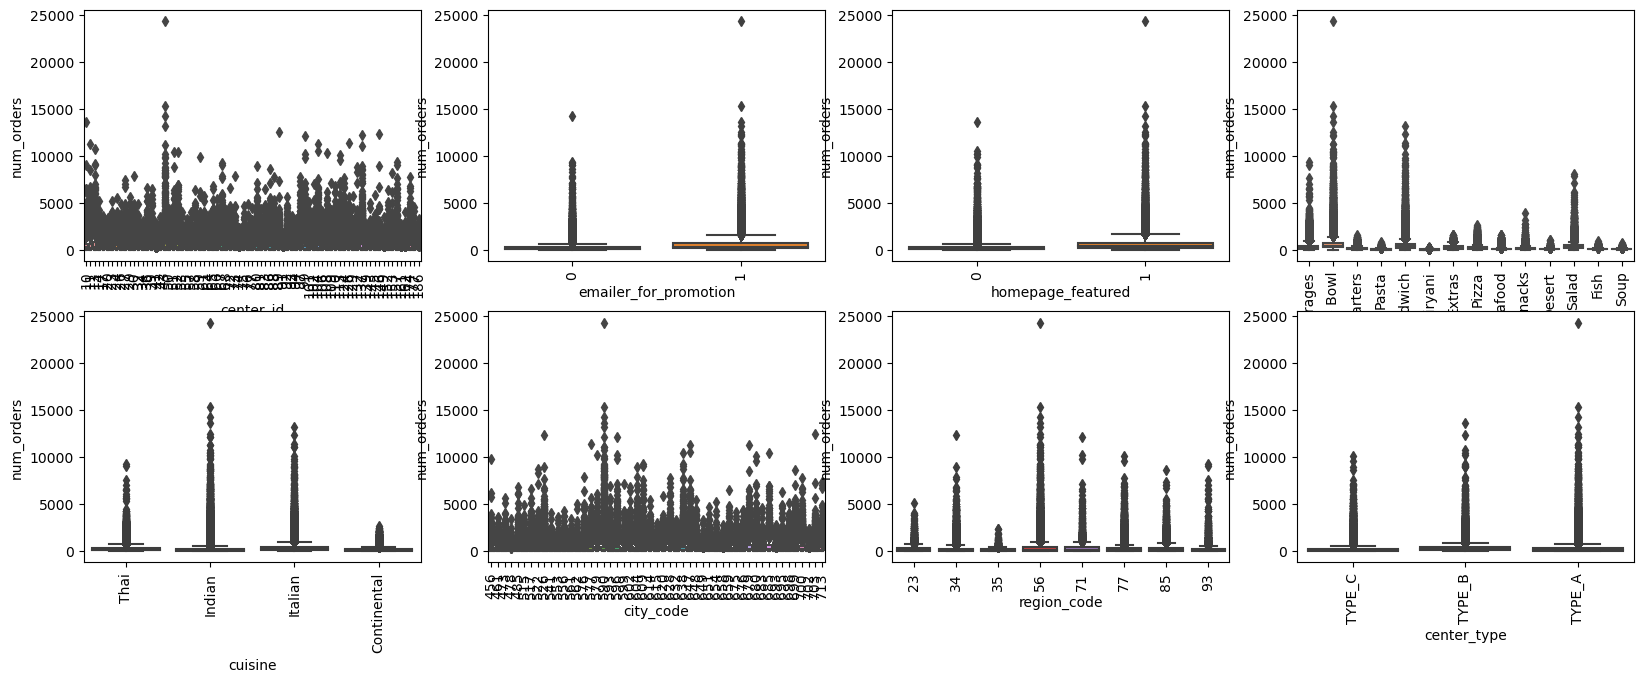

In [26]:
plt.figure(figsize=(20,15))
t = 1
for i in cat_col:
    if i!= 'num_orders':
        plt.subplot(4,4,t)
    sns.boxplot(df_f[i],df_f['num_orders'])
    t+=1
    plt.xticks(rotation = 90)
    
plt.show()

In [27]:
df_f.skew()

# checkout_price , base_price , emailer_for_promotion , homepage_featured has highly skeweed 

id                      -0.001102
week                    -0.049517
center_id                0.345130
meal_id                 -0.172884
checkout_price           0.672330
base_price               0.637661
emailer_for_promotion    3.067713
homepage_featured        2.506022
num_orders               6.929966
city_code               -0.209131
region_code              0.056254
op_area                  0.664414
dtype: float64

## Multivariate analysis

<AxesSubplot:>

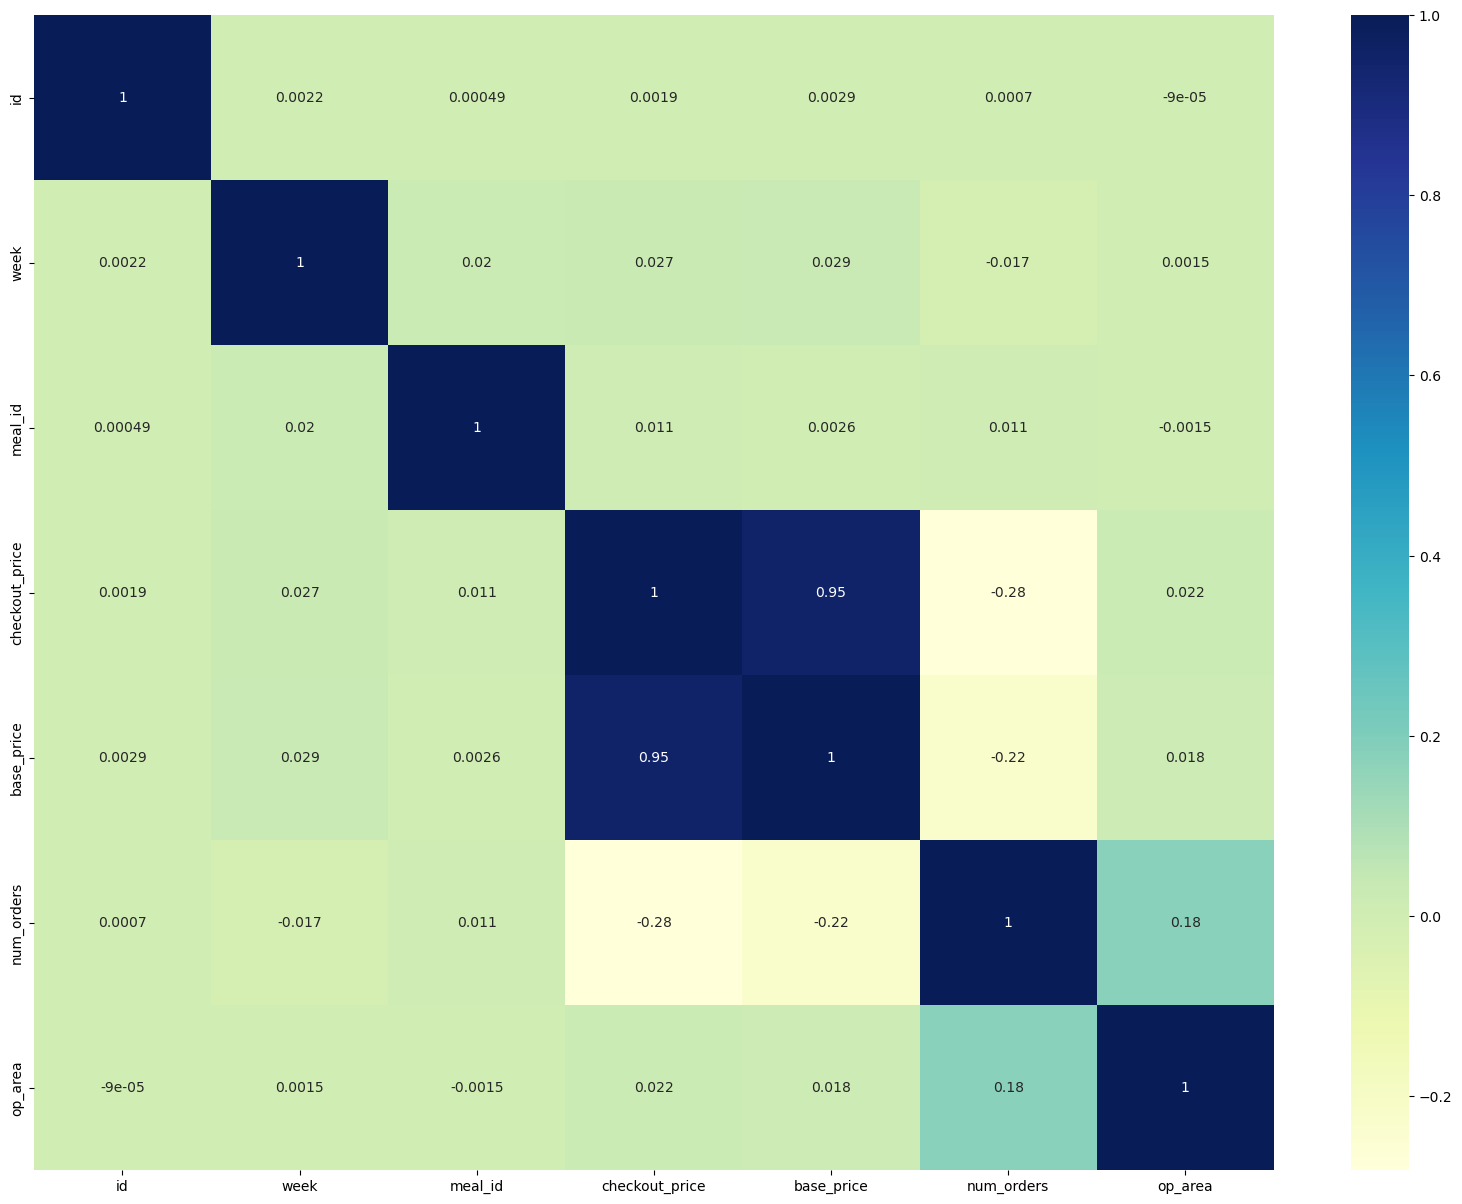

In [28]:
plt.figure(figsize=(20,15))
sns.heatmap(df_f.corr() , cmap="YlGnBu", annot=True)

# ● The correlation between the variable with each order is very low so we believe that the
# multicollinearity is also low in them.
# ● But base_price & checkout_price shows high correlation.

## Feature Engineering

In [29]:
df_f.sort_values('city_code',ascending=False).tail()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
348776,1071333,116,59,2640,292.03,292.03,0,1,244,Starters,Thai,456,56,TYPE_A,4.2
348775,1182778,115,59,2640,292.03,292.03,0,0,325,Starters,Thai,456,56,TYPE_A,4.2
348774,1291053,114,59,2640,292.03,291.03,0,1,188,Starters,Thai,456,56,TYPE_A,4.2
348773,1365727,113,59,2640,291.03,290.03,0,0,203,Starters,Thai,456,56,TYPE_A,4.2
353257,1097490,145,59,2956,640.23,640.23,0,0,53,Fish,Continental,456,56,TYPE_A,4.2


In [30]:
df_f.num_orders.value_counts()

13       12397
15       12294
14       12270
28       11548
27       11462
26       11457
41       10344
40       10179
42       10083
54        8845
53        8715
55        8591
68        7650
67        7589
69        7565
80        6722
81        6683
82        6599
95        5961
94        5855
96        5794
107       5315
108       5230
109       5107
122       4792
121       4760
123       4661
134       4307
136       4248
135       4231
148       4113
149       4104
150       3928
163       3839
161       3721
162       3718
177       3584
175       3468
176       3430
190       3347
188       3216
189       3201
204       3065
202       3059
203       3039
216       2874
217       2856
215       2819
231       2704
229       2678
230       2596
242       2527
244       2481
243       2437
257       2412
256       2333
258       2323
270       2243
269       2243
271       2241
284       2161
283       2152
285       2134
297       2054
298       2051
296       2024
311       

In [31]:
df_f

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0
1,1018704,2,55,1885,135.83,152.29,0,0,323,Beverages,Thai,647,56,TYPE_C,2.0
2,1196273,3,55,1885,132.92,133.92,0,0,96,Beverages,Thai,647,56,TYPE_C,2.0
3,1116527,4,55,1885,135.86,134.86,0,0,163,Beverages,Thai,647,56,TYPE_C,2.0
4,1343872,5,55,1885,146.50,147.50,0,0,215,Beverages,Thai,647,56,TYPE_C,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,1437396,141,61,2104,583.03,630.53,0,1,13,Fish,Continental,473,77,TYPE_A,4.5
456544,1060716,142,61,2104,581.03,582.03,0,0,42,Fish,Continental,473,77,TYPE_A,4.5
456545,1029231,143,61,2104,583.03,581.03,0,0,40,Fish,Continental,473,77,TYPE_A,4.5
456546,1141147,144,61,2104,582.03,581.03,0,0,53,Fish,Continental,473,77,TYPE_A,4.5


In [32]:
df_f[df_f['checkout_price']<df_f['base_price']]

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0
1,1018704,2,55,1885,135.83,152.29,0,0,323,Beverages,Thai,647,56,TYPE_C,2.0
2,1196273,3,55,1885,132.92,133.92,0,0,96,Beverages,Thai,647,56,TYPE_C,2.0
4,1343872,5,55,1885,146.50,147.50,0,0,215,Beverages,Thai,647,56,TYPE_C,2.0
6,1110832,7,55,1885,145.53,146.53,0,0,148,Beverages,Thai,647,56,TYPE_C,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456541,1314947,139,61,2104,490.82,629.53,0,1,312,Fish,Continental,473,77,TYPE_A,4.5
456542,1020517,140,61,2104,485.03,629.53,0,1,149,Fish,Continental,473,77,TYPE_A,4.5
456543,1437396,141,61,2104,583.03,630.53,0,1,13,Fish,Continental,473,77,TYPE_A,4.5
456544,1060716,142,61,2104,581.03,582.03,0,0,42,Fish,Continental,473,77,TYPE_A,4.5


In [33]:
df_f['discount']=np.where(df_f.checkout_price<df_f.base_price,'Yes','No')  # create a new feature discount in the dataset

<AxesSubplot:xlabel='discount', ylabel='count'>

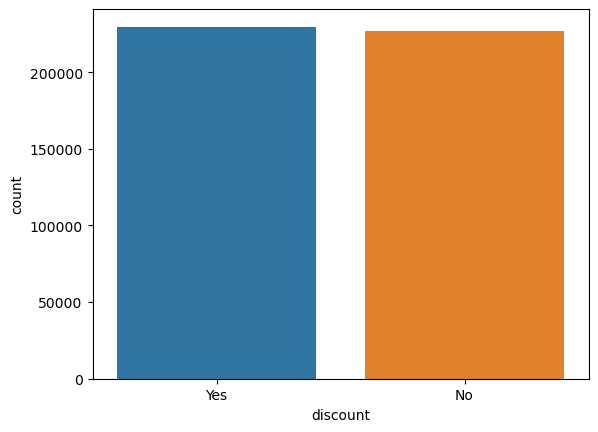

In [34]:
sns.countplot(df_f.discount)

# 1. The Number of Orders having
# Discounted Products and not
# having Discounted Products is
# almost the same.
# 1. This Shows present Discount
# Scheme is not working.

In [35]:
df_f.groupby('center_type')['num_orders'].describe()

,count,mean,std,min,25%,50%,75%,max
center_type,,,,,,,,
TYPE_A,262881.0,262.394456,401.513549,13.0,54.0,136.0,324.0,24299.0
TYPE_B,94074.0,318.856145,436.773777,13.0,69.0,176.0,392.0,13580.0
TYPE_C,99593.0,206.670097,326.716100,13.0,40.0,107.0,258.0,10124.0


In [36]:
df_f.groupby('center_type')['region_code'].describe()

,count,unique,top,freq
center_type,,,,
TYPE_A,262881,8,56,112218
TYPE_B,94074,4,56,41588
TYPE_C,99593,4,56,37422


In [37]:
df_f.region_code.nunique()

8

In [38]:
df_f

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area,discount
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0,Yes
1,1018704,2,55,1885,135.83,152.29,0,0,323,Beverages,Thai,647,56,TYPE_C,2.0,Yes
2,1196273,3,55,1885,132.92,133.92,0,0,96,Beverages,Thai,647,56,TYPE_C,2.0,Yes
3,1116527,4,55,1885,135.86,134.86,0,0,163,Beverages,Thai,647,56,TYPE_C,2.0,No
4,1343872,5,55,1885,146.50,147.50,0,0,215,Beverages,Thai,647,56,TYPE_C,2.0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,1437396,141,61,2104,583.03,630.53,0,1,13,Fish,Continental,473,77,TYPE_A,4.5,Yes
456544,1060716,142,61,2104,581.03,582.03,0,0,42,Fish,Continental,473,77,TYPE_A,4.5,Yes
456545,1029231,143,61,2104,583.03,581.03,0,0,40,Fish,Continental,473,77,TYPE_A,4.5,No
456546,1141147,144,61,2104,582.03,581.03,0,0,53,Fish,Continental,473,77,TYPE_A,4.5,No


In [39]:
df_f.discount.describe()

count     456548
unique         2
top          Yes
freq      229687
Name: discount, dtype: object

In [40]:
# df_f['difference']=np.where(df_f.checkout_price>df_f.base_price,df_f.checkout_price-df_f.base_price,'0')

In [41]:
df_f.meal_id.nunique()

51

In [42]:
df_f.category.nunique()

14

In [43]:
df_f.groupby('category')['checkout_price','base_price'].value_counts().head(10)

category   checkout_price  base_price
Beverages  153.26          153.26        648
           154.26          155.26        633
                           154.26        621
                           153.26        620
           155.26          153.26        618
           153.26          154.26        611
           155.26          155.26        595
                           154.26        592
           153.26          155.26        561
           290.03          292.03        271
dtype: int64

In [44]:
df_f.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area,discount
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0,Yes
1,1018704,2,55,1885,135.83,152.29,0,0,323,Beverages,Thai,647,56,TYPE_C,2.0,Yes
2,1196273,3,55,1885,132.92,133.92,0,0,96,Beverages,Thai,647,56,TYPE_C,2.0,Yes
3,1116527,4,55,1885,135.86,134.86,0,0,163,Beverages,Thai,647,56,TYPE_C,2.0,No
4,1343872,5,55,1885,146.50,147.50,0,0,215,Beverages,Thai,647,56,TYPE_C,2.0,Yes


In [45]:
df_f.groupby(['center_type','region_code','city_code'])['cuisine','op_area','checkout_price','base_price','discount'].value_counts().head(10)

center_type  region_code  city_code  cuisine  op_area  checkout_price  base_price  discount
TYPE_A       23           698        Thai     3.4      290.03          292.03      Yes         41
                                                                       290.03      No          40
                                                                       291.03      Yes         37
                                                       292.03          292.03      No          37
                                                       291.03          291.03      No          36
                                                                       292.03      Yes         36
                                                       292.03          291.03      No          31
                                     Indian   3.4      446.23          447.23      Yes         28
                                                       447.23          446.23      No          28
                          

In [46]:
df_f.groupby(['center_type','cuisine'])['category'].value_counts().head(100)

center_type  cuisine      category    
TYPE_A       Continental  Pizza           18575
                          Beverages       18391
                          Seafood         15946
                          Fish             6302
             Indian       Rice Bowl       18705
                          Beverages       17097
                          Desert          16754
                          Biryani         12414
             Italian      Beverages       18700
                          Sandwich        18681
                          Pasta           16052
                          Salad           16038
             Thai         Beverages       18474
                          Starters        17716
                          Other Snacks    17360
                          Extras           8050
                          Soup             7626
TYPE_B       Continental  Pizza            6425
                          Beverages        6280
                          Seafood          6072
 

In [47]:
df_f.city_code.unique()

array([647, 614, 679, 659, 526, 590, 599, 685, 461, 649, 541, 478, 703,
       576, 628, 702, 579, 596, 648, 632, 522, 615, 577, 517, 651, 683,
       713, 609, 675, 553, 593, 654, 693, 658, 515, 556, 561, 680, 620,
       638, 700, 676, 604, 456, 562, 695, 699, 602, 485, 698, 473],
      dtype=object)

In [48]:
df_f.groupby(['category','cuisine'])['checkout_price'].value_counts().head(10)

category   cuisine      checkout_price
Beverages  Continental  325.98            813
                        323.98            795
                        324.98            793
                        388.00            673
                        390.00            663
                        389.00            650
                        321.10            444
                        324.01            427
                        322.10            420
                        323.01            413
Name: checkout_price, dtype: int64

In [49]:
df_f.category.nunique()

14

In [50]:
df_f.groupby(['category','cuisine'])['checkout_price','base_price','discount'].value_counts().head()

category   cuisine      checkout_price  base_price  discount
Beverages  Continental  325.98          324.98      No          241
                                        323.98      No          240
                        323.98          323.98      No          238
                        324.98          325.98      Yes         228
                                        324.98      No          228
dtype: int64

Text(0, 0.5, 'T otal No of orders')

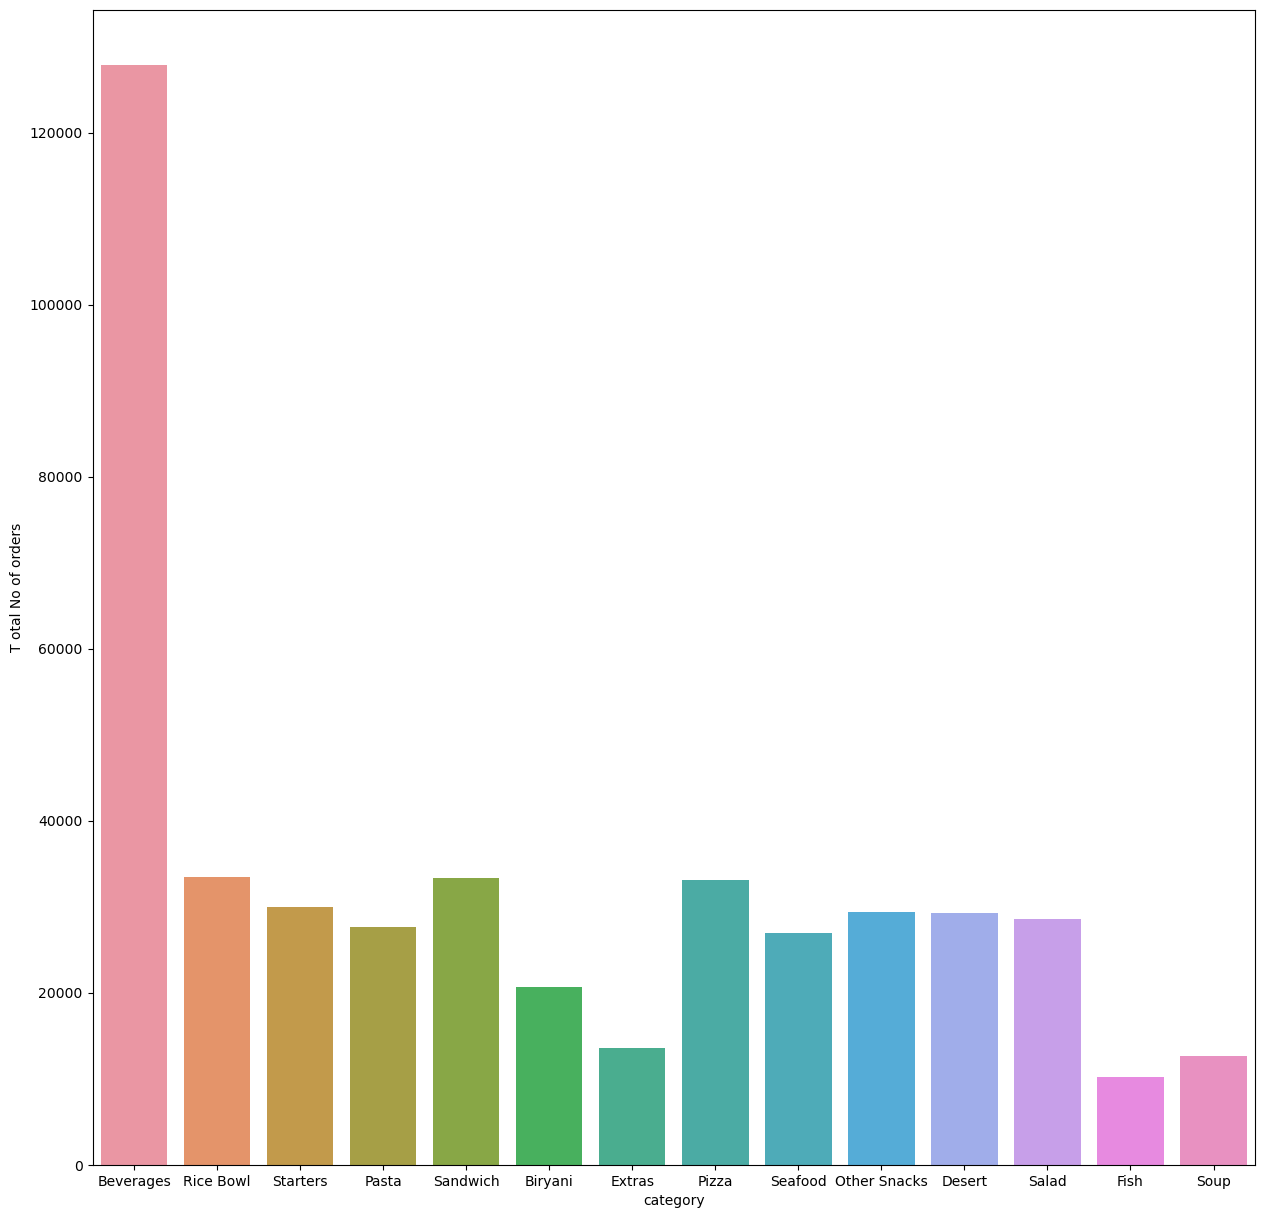

In [51]:
plt.figure(figsize=(15,15))
sns.countplot(df_f['category'])
plt.ylabel('T otal No of orders')

In [52]:
df_f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456548 entries, 0 to 456547
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  object 
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  object 
 7   homepage_featured      456548 non-null  object 
 8   num_orders             456548 non-null  int64  
 9   category               456548 non-null  object 
 10  cuisine                456548 non-null  object 
 11  city_code              456548 non-null  object 
 12  region_code            456548 non-null  object 
 13  center_type            456548 non-null  object 
 14  op_area                456548 non-nu

In [53]:
df_f.isnull().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
category                 0
cuisine                  0
city_code                0
region_code              0
center_type              0
op_area                  0
discount                 0
dtype: int64

In [54]:
df_f.head(100)

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area,discount
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0,Yes
1,1018704,2,55,1885,135.83,152.29,0,0,323,Beverages,Thai,647,56,TYPE_C,2.0,Yes
2,1196273,3,55,1885,132.92,133.92,0,0,96,Beverages,Thai,647,56,TYPE_C,2.0,Yes
3,1116527,4,55,1885,135.86,134.86,0,0,163,Beverages,Thai,647,56,TYPE_C,2.0,No
4,1343872,5,55,1885,146.50,147.50,0,0,215,Beverages,Thai,647,56,TYPE_C,2.0,Yes
5,1493612,6,55,1885,146.53,146.53,0,0,285,Beverages,Thai,647,56,TYPE_C,2.0,No
6,1110832,7,55,1885,145.53,146.53,0,0,148,Beverages,Thai,647,56,TYPE_C,2.0,Yes
7,1461167,8,55,1885,146.53,145.53,0,0,135,Beverages,Thai,647,56,TYPE_C,2.0,No
8,1102364,9,55,1885,134.83,134.83,0,0,175,Beverages,Thai,647,56,TYPE_C,2.0,No
9,1018130,10,55,1885,144.56,143.56,0,0,175,Beverages,Thai,647,56,TYPE_C,2.0,No


In [55]:
num = df_f.select_dtypes(include=np.number).columns

In [56]:
cat = df_f.select_dtypes(exclude=np.number).columns

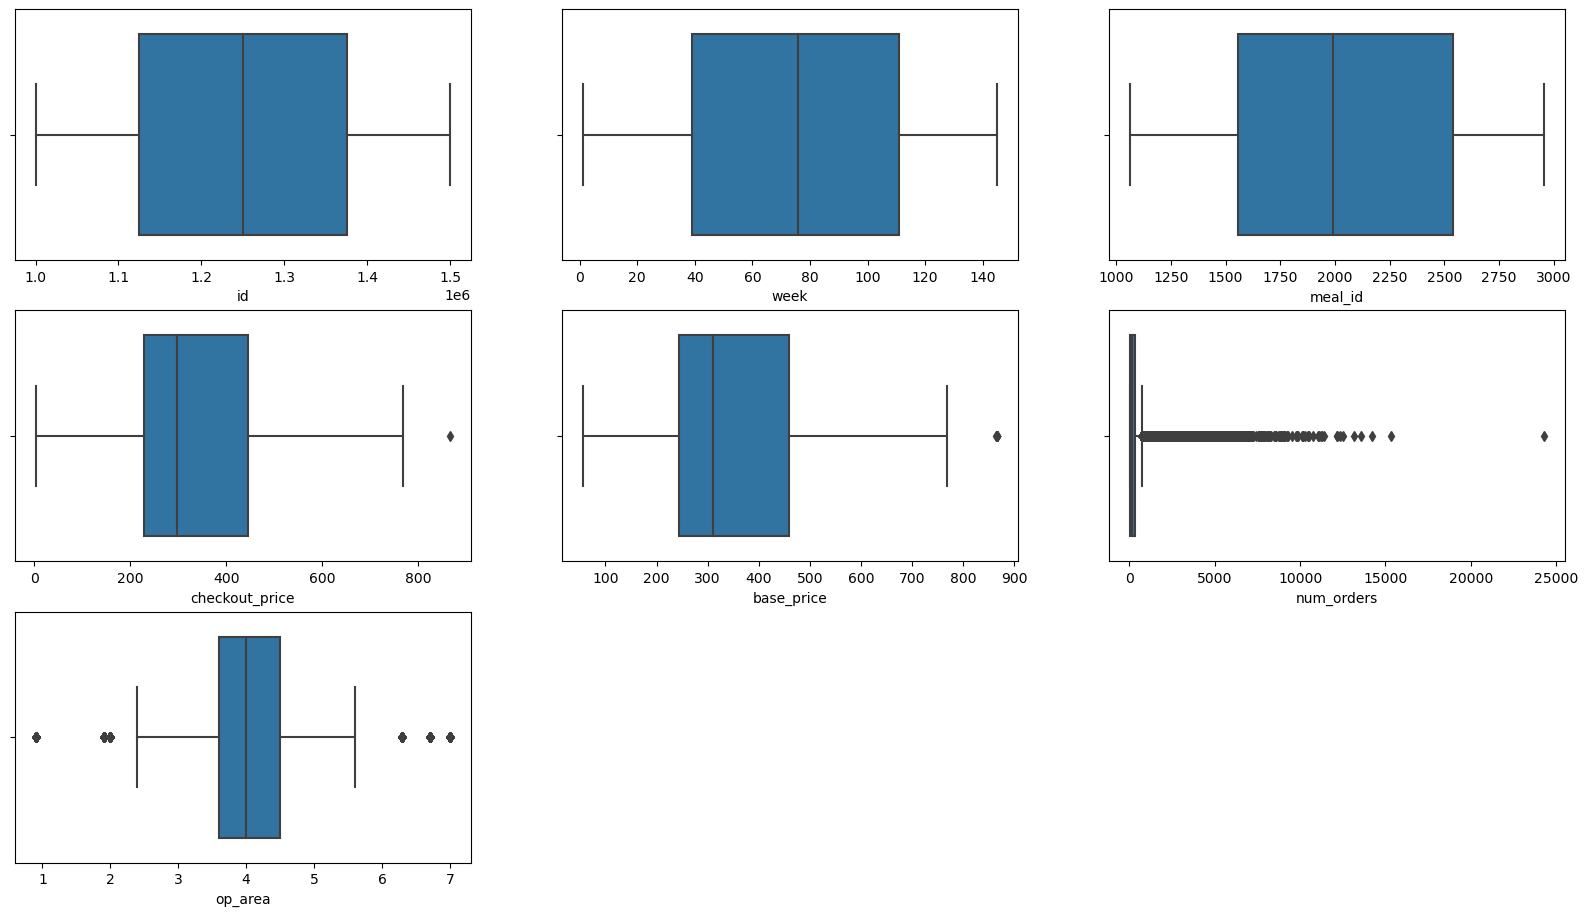

In [57]:
plt.figure(figsize=(20,15))
t = 1
for i in num:
    
        plt.subplot(4,3,t)
        sns.boxplot(df_f[i])
        t+=1
plt.show()

## Outlier treatment 

In [58]:
# by capping
for i in num:
    if i != 'num_orders':
        q1,q3=np.quantile(df_f[i],(0.25,0.75))
        iqr = q3-q1
        ul = q3+iqr*1.5
        ll = q1-iqr*1.5
        df_f.loc[df_f[i]>ul,i]=ul
        df_f.loc[df_f[i]<ll,i]=ll

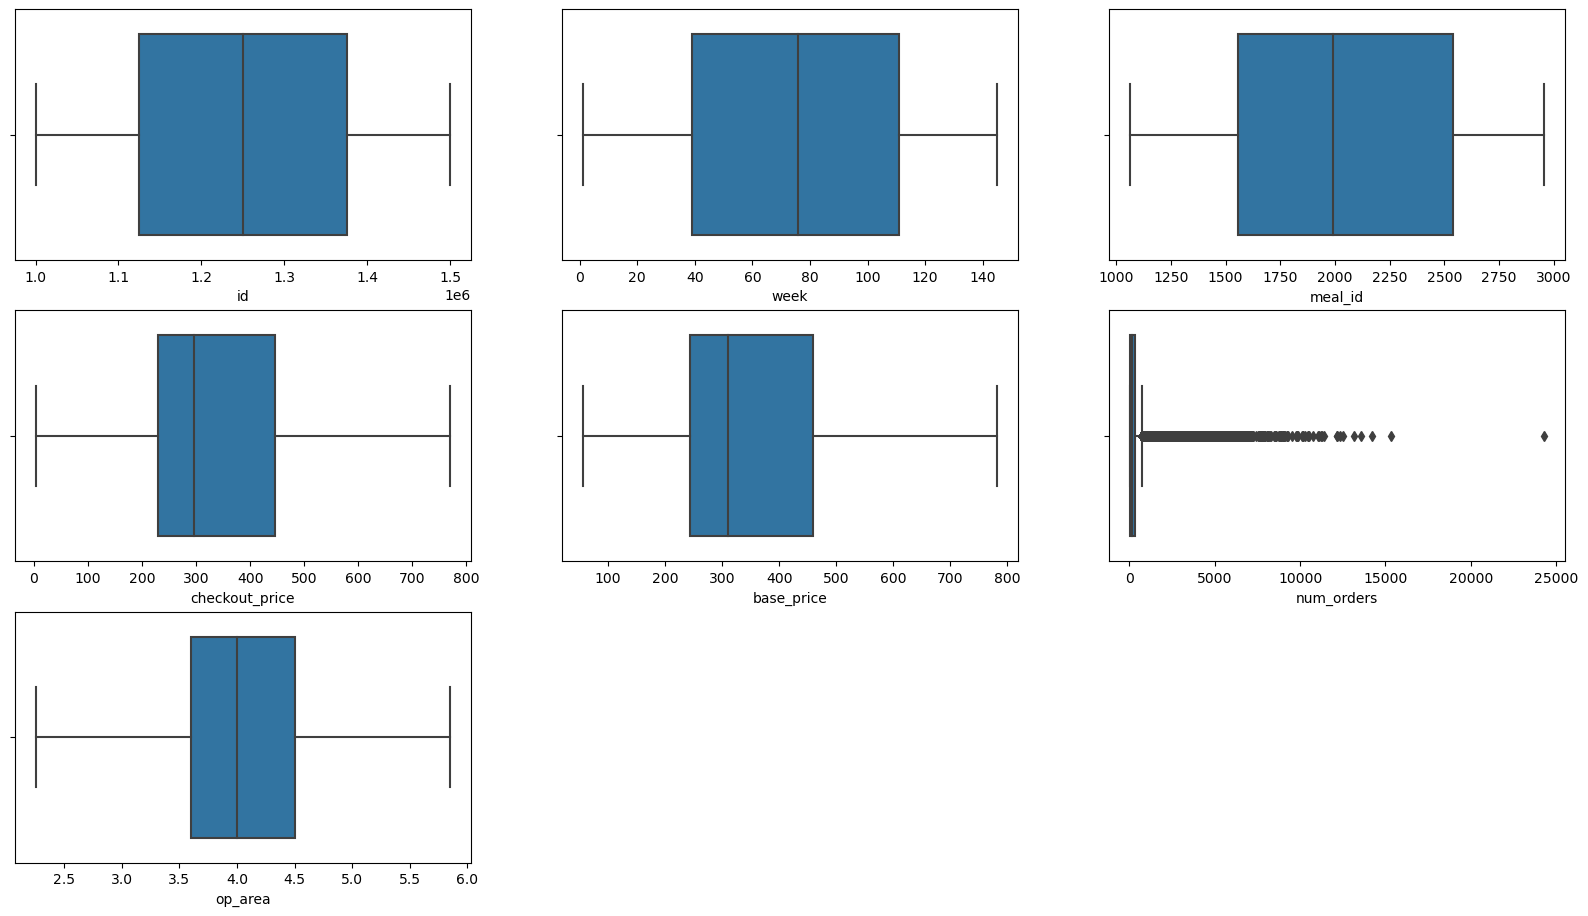

In [59]:
plt.figure(figsize=(20,15))
t = 1
for i in num:
    
        plt.subplot(4,3,t)
        sns.boxplot(df_f[i])
        t+=1
plt.show()


# num_orders are target variable so we keep it raw

## Find Significant Columns using Statistical Tests

In [60]:
import scipy.stats as st

In [61]:
num

Index(['id', 'week', 'meal_id', 'checkout_price', 'base_price', 'num_orders',
       'op_area'],
      dtype='object')

In [62]:
sig_features=[]
for i in num:
    if i!= 'num_orders':
        if st.mannwhitneyu(df_f[i],df_f['num_orders'])[1]<0.05:
            print(i,st.mannwhitneyu(df_f[i],df_f['num_orders'])[1])
            sig_features.append(i)

print(sig_features)
        

id 0.0
week 0.0
meal_id 0.0
checkout_price 0.0
base_price 0.0
op_area 0.0
['id', 'week', 'meal_id', 'checkout_price', 'base_price', 'op_area']


In [63]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [64]:
df_f[cat].describe()

,center_id,emailer_for_promotion,homepage_featured,category,cuisine,city_code,region_code,center_type,discount
count,456548,456548,456548,456548,456548,456548,456548,456548,456548
unique,77,2,2,14,4,51,8,3,2
top,13,0,0,Beverages,Italian,590,56,TYPE_A,Yes
freq,7046,419498,406693,127890,122925,54746,191228,262881,229687


In [65]:
for i in cat:
    if i!='id':
        mod=ols('num_orders~%s'%i, data=df_f).fit()  # %s means format specifier used to pass String.
        aov=sm.stats.anova_lm(mod)
        print(aov)

                 df        sum_sq       mean_sq           F  PR(>F)
center_id      76.0  4.571449e+09  6.015064e+07  409.839904     0.0
Residual   456471.0  6.699451e+10  1.467662e+05         NaN     NaN
                             df        sum_sq       mean_sq             F  \
emailer_for_promotion       1.0  5.497009e+09  5.497009e+09  37985.125875   
Residual               456546.0  6.606895e+10  1.447148e+05           NaN   

                       PR(>F)  
emailer_for_promotion     0.0  
Residual                  NaN  
                         df        sum_sq       mean_sq             F  PR(>F)
homepage_featured       1.0  6.206522e+09  6.206522e+09  43353.535674     0.0
Residual           456546.0  6.535944e+10  1.431607e+05           NaN     NaN
                df        sum_sq       mean_sq            F  PR(>F)
category      13.0  1.307450e+10  1.005731e+09  7849.871954     0.0
Residual  456534.0  5.849146e+10  1.281207e+05          NaN     NaN
                df        sum_

## Testing for the Assumptions of Linear Regression

## Normality Test:-

In [66]:
norm_features=[]
for i in num:
    _,p_val=st.shapiro(df_f[i]) # _ is the variable Name.
    if p_val>0.05:
        print(i,p_val)
        norm_features.append(i)
        
print(norm_features)    # there are no normally distributed feature

[]


In [67]:
# rest of the Assumptions are checked after the base model has been created

# reducing the features by combining
### we reduce the 'emailer_for_promotion' & 'homepage_featured' features by combining it as a 'promotion' 

In [68]:
df_f['promotion']=df_f['emailer_for_promotion']+df_f['homepage_featured']

In [69]:
df_f['promotion']=np.where(df_f.promotion>=1,1,0)

## Frequency Encoding 

In [70]:
# we have done freq encoding becz their are many category in each variable of the dataset that shout up the columns

In [71]:

for i in cat:
    c=(df_f[i].value_counts(normalize=True)*100).to_dict()
    df_f[i]=df_f[i].map(c)
    

In [72]:
df_f

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area,discount,promotion
0,1379560.0,1,1.127154,1885.0,136.83,152.29,91.884753,89.080009,177,28.012389,25.893444,2.591841,41.885629,21.814355,2.25,50.309496,0
1,1018704.0,2,1.127154,1885.0,135.83,152.29,91.884753,89.080009,323,28.012389,25.893444,2.591841,41.885629,21.814355,2.25,50.309496,0
2,1196273.0,3,1.127154,1885.0,132.92,133.92,91.884753,89.080009,96,28.012389,25.893444,2.591841,41.885629,21.814355,2.25,50.309496,0
3,1116527.0,4,1.127154,1885.0,135.86,134.86,91.884753,89.080009,163,28.012389,25.893444,2.591841,41.885629,21.814355,2.25,49.690504,0
4,1343872.0,5,1.127154,1885.0,146.50,147.50,91.884753,89.080009,215,28.012389,25.893444,2.591841,41.885629,21.814355,2.25,50.309496,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,1437396.0,141,1.282450,2104.0,583.03,630.53,91.884753,10.919991,13,2.231310,22.515705,1.282450,20.723341,57.580145,4.50,50.309496,1
456544,1060716.0,142,1.282450,2104.0,581.03,582.03,91.884753,89.080009,42,2.231310,22.515705,1.282450,20.723341,57.580145,4.50,50.309496,0
456545,1029231.0,143,1.282450,2104.0,583.03,581.03,91.884753,89.080009,40,2.231310,22.515705,1.282450,20.723341,57.580145,4.50,49.690504,0
456546,1141147.0,144,1.282450,2104.0,582.03,581.03,91.884753,89.080009,53,2.231310,22.515705,1.282450,20.723341,57.580145,4.50,49.690504,0


In [73]:
df_f.shape

(456548, 17)

In [74]:
df_f['promotion']=df_f['promotion'].astype(float)

In [75]:
df_f.drop(['id','emailer_for_promotion','homepage_featured'],inplace = True , axis = 1)

In [76]:
df_f

,week,center_id,meal_id,checkout_price,base_price,num_orders,category,cuisine,city_code,region_code,center_type,op_area,discount,promotion
0,1,1.127154,1885.0,136.83,152.29,177,28.012389,25.893444,2.591841,41.885629,21.814355,2.25,50.309496,0.0
1,2,1.127154,1885.0,135.83,152.29,323,28.012389,25.893444,2.591841,41.885629,21.814355,2.25,50.309496,0.0
2,3,1.127154,1885.0,132.92,133.92,96,28.012389,25.893444,2.591841,41.885629,21.814355,2.25,50.309496,0.0
3,4,1.127154,1885.0,135.86,134.86,163,28.012389,25.893444,2.591841,41.885629,21.814355,2.25,49.690504,0.0
4,5,1.127154,1885.0,146.50,147.50,215,28.012389,25.893444,2.591841,41.885629,21.814355,2.25,50.309496,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,141,1.282450,2104.0,583.03,630.53,13,2.231310,22.515705,1.282450,20.723341,57.580145,4.50,50.309496,1.0
456544,142,1.282450,2104.0,581.03,582.03,42,2.231310,22.515705,1.282450,20.723341,57.580145,4.50,50.309496,0.0
456545,143,1.282450,2104.0,583.03,581.03,40,2.231310,22.515705,1.282450,20.723341,57.580145,4.50,49.690504,0.0
456546,144,1.282450,2104.0,582.03,581.03,53,2.231310,22.515705,1.282450,20.723341,57.580145,4.50,49.690504,0.0


In [77]:
df_f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456548 entries, 0 to 456547
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   week            456548 non-null  int64  
 1   center_id       456548 non-null  float64
 2   meal_id         456548 non-null  float64
 3   checkout_price  456548 non-null  float64
 4   base_price      456548 non-null  float64
 5   num_orders      456548 non-null  int64  
 6   category        456548 non-null  float64
 7   cuisine         456548 non-null  float64
 8   city_code       456548 non-null  float64
 9   region_code     456548 non-null  float64
 10  center_type     456548 non-null  float64
 11  op_area         456548 non-null  float64
 12  discount        456548 non-null  float64
 13  promotion       456548 non-null  float64
dtypes: float64(12), int64(2)
memory usage: 52.2 MB


## Spliting the dataset for Validation 

In [78]:
from sklearn.model_selection import train_test_split

In [80]:
# cat = df_f[['center_id', 'category','promotion'
#        'cuisine', 'city_code', 'region_code', 'center_type', 'discount']]

In [155]:
x = df_f.drop('num_orders',axis = 1)
y = df_f['num_orders']

In [156]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=.30,random_state=10)

In [157]:
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((319583, 13), (136965, 13), (319583,), (136965,))

In [84]:
num = df_f[['week', 'meal_id', 'checkout_price', 'base_price', 'op_area']]

## scalering 

In [85]:
from sklearn.preprocessing import StandardScaler

In [86]:
sc = StandardScaler()

In [87]:
for i in num:
    xtrain.loc[:,i]=sc.fit_transform(pd.DataFrame(xtrain.loc[:,i]))
    xtest.loc[:,i]=sc.transform(pd.DataFrame(xtest.loc[:,i]))

In [88]:
y

0         177
1         323
2          96
3         163
4         215
         ... 
456543     13
456544     42
456545     40
456546     53
456547     27
Name: num_orders, Length: 456548, dtype: int64

## Applying the base Model

In [89]:
import statsmodels.api as sma
from statsmodels.formula.api import ols

In [90]:
x_train = sma.add_constant(xtrain)
x_test = sma.add_constant(xtest)


In [91]:
modelstats = sma.OLS(ytrain,x_train).fit()

In [92]:
modelstats.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             num_orders   R-squared:                       0.207
Model:                            OLS   Adj. R-squared:                  0.207
Method:                 Least Squares   F-statistic:                     6406.
Date:                Fri, 23 Dec 2022   Prob (F-statistic):               0.00
Time:                        11:26:10   Log-Likelihood:            -2.3287e+06
No. Observations:              319583   AIC:                         4.657e+06
Df Residuals:                  319569   BIC:                         4.658e+06
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           -381.7945    116.621     -3.274      0.001    -610.369    -153.220
week              -2.2532      0.626     -3.599      0.000      -3.480      -1.026
center_id        318.1880      6.196     51.353      0.000     306.044     330.332
meal_id            1.4970      0.640      2.341      0.019       0.243       2.751
checkout_price  -125.4555      2.626    -47.775      0.000    -130.602    -120.309
base_price        40.0345      2.775     14.428      0.000      34.596      45.473
category           0.7640      0.086      8.884      0.000       0.595       0.933
cuisine           15.9246      0.618     25.773      0.000      14.714      17.136
city_code          4.7768      0.176     27.115      0.000       4.432       5.122
region_code       -0.2474      0.058     -4.252      0.000      -0.361      -0.133
center_type       -0.6049      0.037    -16.344      0.000      -0.677      -0.532
op_area           37.0789      0.865     42.882      0.000      35.384      38.774
discount          -4.3423      2.309     -1.881      0.060      -8.867       0.183
promotion        314.1021      2.056    152.806      0.000     310.073     318.131
==============================================================================
Omnibus:                   439405.374   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        409228373.848
Skew:                           7.511   Prob(JB):                         0.00
Kurtosis:                     177.661   Cond. No.                     1.45e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [93]:
# We can see that the Condition Number is very Large, which indicates the presence of Multicollinearity.
# We need to cross-check the Assumptions of Linear Regression.

<AxesSubplot:>

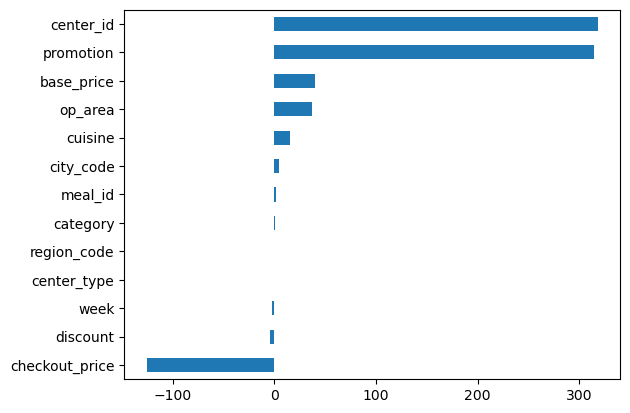

In [94]:
modelstats.params[1:].sort_values().plot(kind='barh')

# hence the checkout_price is showing -ve relation with the model and center_id , promotion is showing high relation

In [95]:
ytrain

250133     14
222848    203
435889     68
321089    177
52108     378
         ... 
93553     135
443712    136
356879     13
236669     55
345353     26
Name: num_orders, Length: 319583, dtype: int64

In [96]:
## Hence R-square is very low so we try to uplift it by transforming the model

## Checking Multicollinearity

In [97]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [98]:
numeric=xtrain.select_dtypes(include=np.number)
numeric.values

array([[ 9.45977449e-01,  1.29033530e+00,  7.67582951e-01, ...,
        -3.40474592e-02,  4.96905035e+01,  0.00000000e+00],
       [-7.64834686e-01,  1.32319055e+00,  9.95952047e-01, ...,
        -1.50988222e+00,  4.96905035e+01,  0.00000000e+00],
       [-2.58819829e-01,  1.29800152e+00,  1.24259067e+00, ...,
        -3.40474592e-02,  4.96905035e+01,  0.00000000e+00],
       ...,
       [-7.64834686e-01,  1.22834839e+00,  1.54038397e+00, ...,
         7.94782920e-02,  5.03094965e+01,  0.00000000e+00],
       [-1.56000089e+00,  1.01347503e+00,  1.10922312e+00, ...,
        -1.39635647e+00,  4.96905035e+01,  0.00000000e+00],
       [-2.82915774e-01,  1.33589458e+00, -1.50880019e+00, ...,
        -1.16930497e+00,  5.03094965e+01,  0.00000000e+00]])

In [99]:
vif=[variance_inflation_factor(numeric.values, i) for i in range(numeric.shape[1])]

In [100]:
pd.DataFrame({'VIF':vif}, index=numeric.columns).sort_values(by='VIF', ascending=False)

,VIF
discount,806.491929
cuisine,607.648146
center_id,172.588861
base_price,17.585987
checkout_price,14.773450
region_code,8.603819
center_type,7.356491
category,4.643069
city_code,2.333417
op_area,1.909720


In [101]:
# We can see that discount, cuisine, center_id, base_price, checkout_price 
# have VIF greater than 10, so these features can be dropped.

# Checking Normality of Residuals:-

In [102]:
residual=modelstats.resid
residual

250133     55.198821
222848     39.975448
435889   -209.440937
321089    -24.411784
52108     152.527745
             ...    
93553    -394.303031
443712    -15.284691
356879     23.426195
236669    -57.494433
345353   -236.315136
Length: 319583, dtype: float64

<AxesSubplot:ylabel='Density'>

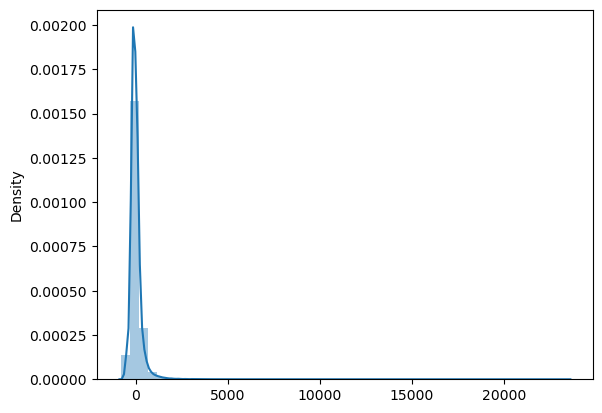

In [103]:
sns.distplot(residual)

In [104]:
from statsmodels.graphics.gofplots import qqplot

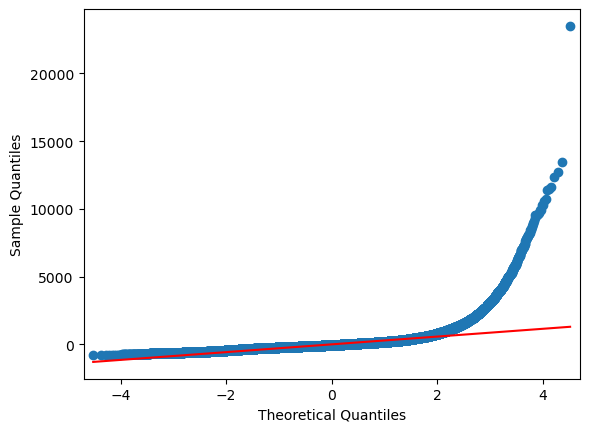

In [105]:
qqplot(residual, line='r')
plt.show()

In [106]:
# As we can see the Blue dots diverging from the red line, which shows the residuals don't have normal distribution.

In [107]:
import scipy.stats as stats
stats.shapiro(residual)

ShapiroResult(statistic=0.6598315834999084, pvalue=0.0)

In [108]:
# Residual Distribution is not Normal. Hence it doesn't satisfy the Normality Assumption.

# HeteroSkedasticity

In [109]:
y_pred_train= modelstats.predict(x_train)

<AxesSubplot:xlabel='num_orders'>

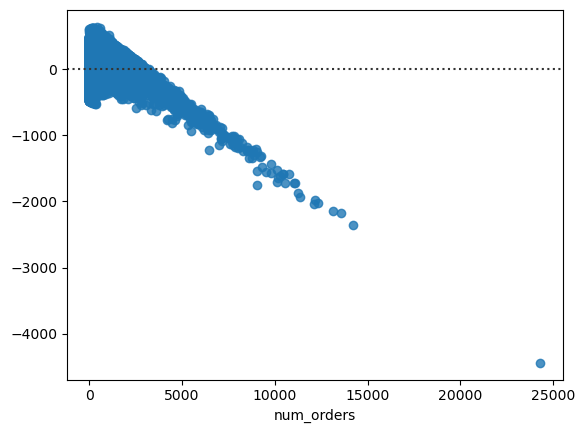

In [110]:
sns.residplot(ytrain,y_pred_train)

In [111]:
# Breusch Pagan Test: To check for Hetero Skedasticity of Residual
# Ho: Homoscedasticity is Present
# Ha: Heteroscedasticity is Present

In [112]:
import statsmodels.stats.api as sst

_, p_value,_,f_p_value_ = sst.het_breuschpagan(residual,modelstats.model.exog)
print(p_value,'\n' ,f_p_value_)

0.0 
 0.0


In [113]:
# Heteroskedasticity is present in the Model.

In [114]:
## Hence we are not apply further Assumption on that

## Transformation

In [115]:
from sklearn.preprocessing import PowerTransformer

In [116]:
pt = PowerTransformer()

In [117]:
xtrain_tranform=pd.DataFrame(pt.fit_transform(xtrain),columns=xtrain.columns)

In [118]:
xtest_tranform=pd.DataFrame(pt.transform(xtest),columns=xtest.columns)
xtest_tranform

,week,center_id,meal_id,checkout_price,base_price,category,cuisine,city_code,region_code,center_type,op_area,discount,promotion
0,0.920805,-0.325782,-1.662295,-1.331774,-1.267735,1.423261,1.259266,-0.904490,-0.694611,0.858455,0.882454,0.99295,-0.417310
1,-1.028485,0.472565,0.851873,-0.952025,-0.654238,-1.894593,0.386618,0.427973,1.056042,-1.130798,1.196945,0.99295,-0.417310
2,-1.307390,1.029665,-0.173244,1.186343,1.334028,-0.188628,-1.467918,-0.655731,1.056042,0.858455,0.882454,0.99295,2.396301
3,-0.512056,0.300043,0.750703,1.488752,1.349493,-0.521434,-1.467918,-0.775663,-2.027149,0.858455,0.561252,0.99295,-0.417310
4,-0.155118,1.368492,-0.310594,-1.440090,-1.585944,1.423261,0.386618,0.928748,1.056042,0.858455,1.960593,-1.00710,-0.417310
...,...,...,...,...,...,...,...,...,...,...,...,...,...
136960,1.370365,-0.560951,1.543168,0.139521,0.016217,-0.181515,1.259266,-0.961517,-0.312491,0.858455,0.005895,0.99295,-0.417310
136961,-0.794645,1.163645,-0.893722,1.046564,0.908506,-0.383210,-0.443281,0.432824,1.056042,-1.199814,0.452421,-1.00710,-0.417310
136962,0.747205,-1.976766,0.153813,-0.146076,-0.302409,1.423261,-0.443281,1.486518,-0.312491,-1.130798,-2.146312,-1.00710,-0.417310
136963,-0.441026,-1.976766,0.444681,-0.261299,-0.410599,-0.176105,-0.443281,1.486518,-0.312491,-1.130798,-2.146312,-1.00710,-0.417310


In [119]:
x_train = sma.add_constant(xtrain)
x_test = sma.add_constant(xtest)

In [120]:
# sma.OLS(ytrain,xtrain_tranform).fit().summary()

## linear Regression

In [121]:
from sklearn.linear_model import LinearRegression

In [122]:
lr = LinearRegression()

In [123]:
model_lr=lr.fit(xtrain,ytrain)

In [124]:
pred = model_lr.predict(xtest)

In [125]:
from sklearn.metrics import r2_score  , mean_squared_error , mean_absolute_percentage_error , mean_squared_error

In [126]:
def validation(test,pred):
    r2 = r2_score(test,pred)
    print('R-Square: ',r2)
    n = x_test.shape[0]
    k = x_test.shape[1]
    adj_r2= 1-((1-r2)*(n-1)/(n-k-1))
    print('Adjusted R2: ',adj_r2)
    print('MSE: ',mean_squared_error(test,pred))
    print('RMSE: ',mean_squared_error(test,pred)**0.5)
    print('MAPE: ',mean_absolute_percentage_error(test,pred))

In [127]:
validation(ytest,pred)

R-Square:  0.20773498019617065
Adjusted R2:  0.2076539892485456
MSE:  122785.74028674772
RMSE:  350.4079626474657
MAPE:  2.461595015131105


In [128]:
# this model is underfit in this case 

# applying Transformed dataset in linear Regression 

In [129]:
model_lrp=lr.fit(xtrain_tranform,ytrain)

In [130]:
pred = model_lrp.predict(xtest_tranform)

In [131]:
validation(ytest,pred)

R-Square:  0.2212159013651147
Adjusted R2:  0.22113628853283362
MSE:  120696.45848823295
RMSE:  347.4139583957918
MAPE:  2.3672306444378197


In [132]:
# hence r2 square inc by only 2%
# RMSE - reduce by 3

## feature selection

In [133]:
from sklearn.feature_selection import RFE

In [134]:
 rfe = RFE(estimator=LinearRegression(), n_features_to_select=5)

In [135]:
X=pd.concat([xtrain,xtest],axis = 0).sort_index()

In [136]:
Y = pd.DataFrame(y)

In [137]:
rfe.fit(X,Y)

RFE(estimator=LinearRegression(), n_features_to_select=5)

In [138]:
pd.Series(rfe.ranking_,index=xtrain.columns).sort_values().index[0:5]

Index(['center_id', 'checkout_price', 'base_price', 'op_area', 'promotion'], dtype='object')

In [139]:
rfe_selector = df_f[['center_id', 'checkout_price', 'base_price', 'op_area', 'promotion']]

In [140]:
xtrain,xtest,ytrain,ytest = train_test_split(rfe_selector,y,test_size=.30,random_state=10)

In [141]:
model_rfe=lr.fit(xtrain,ytrain)

In [142]:
pred1 = model_rfe.predict(xtest)

In [143]:
validation(ytest,pred1)   # model is not performing after taking best parameter from rfe 

R-Square:  0.20258046308991484
Adjusted R2:  0.20249894521100475
MSE:  123584.59064981063
RMSE:  351.546000759233
MAPE:  2.440816018097879


## other models

## DecisionTree Regressor

In [144]:
from sklearn.tree import DecisionTreeRegressor

In [145]:
dt = DecisionTreeRegressor()

In [146]:
model_dt = dt.fit(xtrain,ytrain)

In [147]:
pred2=model_dt.predict(xtest)

In [148]:
validation(ytest,pred2)

R-Square:  0.45519740692957555
Adjusted R2:  0.45514171334576403
MSE:  84433.85486949213
RMSE:  290.57504171812855
MAPE:  1.0661150709803788


In [149]:
# Hence in the Decision Tree Regressor we have seen the R2 improve but RMSE remain almost same

# RandomForestRegressor

In [150]:
from sklearn.ensemble import RandomForestRegressor

In [151]:
rf = RandomForestRegressor()

In [158]:
model_rf = rf.fit(xtrain,ytrain).predict(xtest)

In [159]:
validation(ytest,model_rf)

R-Square:  0.8639874475359599
Adjusted R2:  0.8639735433684936
MSE:  21079.312509243966
RMSE:  145.18716372064014
MAPE:  0.48401524172283095


# XGBRegressor

In [154]:
from xgboost import XGBRegressor

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
xg = XGBRegressor()

In [ ]:
pred_xg = xg.fit(xtrain,ytrain).predict(xtest)

In [ ]:
validation(ytest,pred_xg)

In [161]:
from sklearn.model_selection import GridSearchCV

In [162]:
parameters = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [1,2,3,4],
}
regr = RandomForestRegressor(random_state=0)

clf = GridSearchCV(regr, parameters)
clf.fit(xtrain, ytrain)

GridSearchCV(estimator=RandomForestRegressor(random_state=0),
             param_grid={'max_depth': [1, 2, 3, 4],
                         'n_estimators': [100, 150, 200, 250, 300]})

In [163]:
pred_cv = clf.predict(xtest)

In [164]:
validation(ytest,pred_cv)

R-Square:  0.45365622375236225
Adjusted R2:  0.4536003726178791
MSE:  84672.70842556415
RMSE:  290.98575295976974
MAPE:  1.5933862515417778
